In [1]:
import networkx as nx 
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np
import collections
import powerlaw
import operator
import scipy.stats
import random
import math
import csv
import random
import networkx as nx
G=nx.read_edgelist("C:/DrugBank/4.2/ddi-4.2-edges.csv", delimiter=',', create_using = nx.Graph(), nodetype=str)

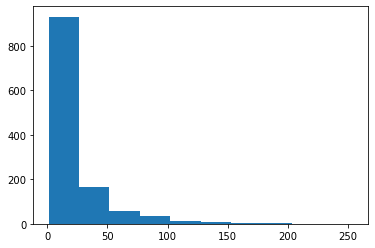

In [2]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
plot_degree_dist(G)

In [3]:
print("No of nodes ", G.number_of_nodes())
print("No of links ", G.number_of_edges())
print("Density ", nx.density(G))
giant = max(nx.connected_components(G), key=len)
gcc = G.subgraph(giant)
print("No Nodes largest component ", gcc.number_of_nodes())
print("Diameter of largest component ", nx.diameter(gcc))
degrees = G.degree()
degree_values = [v for k, v in degrees]
sum_of_degrees = sum(degree_values)
average_degree = sum_of_degrees/G.number_of_nodes()
print("Average degree ", average_degree)
print("Average path length ", nx.average_shortest_path_length(gcc))
print("Average clustering coefficient ", nx.average_clustering(G))

No of nodes  1212
No of links  12071
Density  0.016448506948134947
No Nodes largest component  1210
Diameter of largest component  8
Average degree  19.919141914191417
Average path length  2.9983471074380166
Average clustering coefficient  0.198892227998149


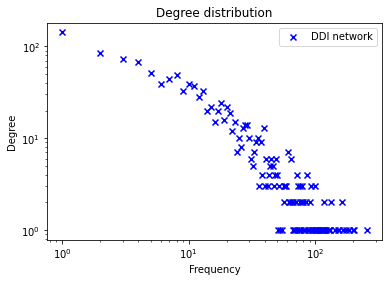

In [4]:
degrees = [G.degree(n) for n in G.nodes()]
dict_dd = { i : degrees[i] for i in range(0, len(degrees) ) }
dd_2 = dict(collections.Counter(dict_dd.values()))
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Frequency')
plt.ylabel('Degree')
#plt.legend(['Initial network','Network after attack-repair rounds'], loc='upper right')
#plt.xlim((2.5e-3,1.5e-1))
#plt.ylim((.9,6.5e2))
plt.scatter(dd_2.keys(),dd_2.values(),c='b',marker='x')
plt.legend(['DDI network'], loc='upper right')

In [5]:
deg_array = np.asarray(degrees)
results_deg = powerlaw.Fit(deg_array)
print ("Degree")
print(results_deg.power_law.alpha)
print(results_deg.power_law.xmin)

Degree
3.971759483630614
72.0


Calculating best minimal value for power law fit
C:\Users\MihaiUM\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


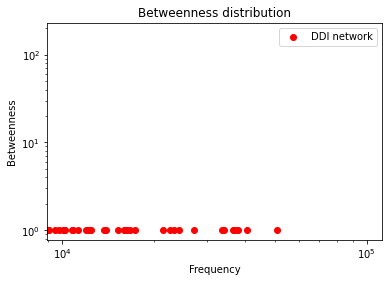

In [6]:
bw_centrality = nx.betweenness_centrality(G, normalized=False)
#for k, v in bw_centrality.items():
#    bw_centrality[k] = int(v/100)
bd_2 = dict(collections.Counter(bw_centrality.values()))
#print (bw_centrality)
plt.xscale('log')
plt.yscale('log')
plt.title('Betweenness distribution')
plt.xlabel('Frequency')
plt.ylabel('Betweenness')
#plt.legend(['Initial network','Network after attack-repair rounds'], loc='upper right')
#plt.xlim((2.5e-3,1.5e-1))
#plt.ylim((.9,6.5e2))
plt.scatter(bd_2.keys(),bd_2.values(),c='r',marker='o')
plt.legend(['DDI network'], loc='upper right')

In [7]:
bw_values = bw_centrality.values()
bw_list = list(bw_values)
bet_array = np.asarray(bw_list, dtype=np.float)
results_bet = powerlaw.Fit(bet_array)
print ("Betweenness")
print(results_bet.power_law.alpha)
print(results_bet.power_law.xmin)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


Betweenness
2.1261511102835406
2096.9931358143117


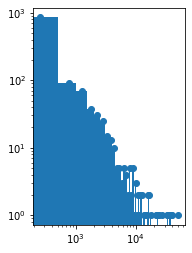

In [8]:
bw_values = bw_centrality.values()
bw_list = list(bw_values)
#plt.hist(degrees, bins=100)
plt.show()

# Usual histogram plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
n, bins, patches = ax1.hist(bw_values, bins=100)
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
ax1.scatter(bins_mean, n)
plt.xscale('log')
plt.yscale('log')

(0.9, 1000.0)

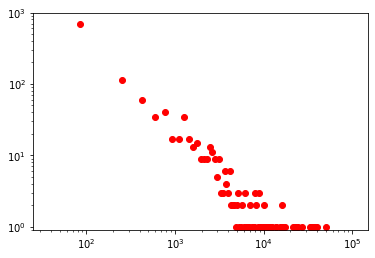

In [9]:
bw_values = bw_centrality.values()
bw_list = list(bw_values)
n, bins, patches = plt.hist(bw_values, bins=300, alpha=0.0)
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
plt.scatter(bins_mean, n, c='r',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlim((2.5e1,1.5e5))
plt.ylim((.9,1e3))

In [7]:
bw_list = list(bw_values)
round_bw = [int(round(num, 0)) for num in bw_list]
print (round_bw)
#print (bw_list)

[1, 8021, 37928, 0, 3765, 33370, 317, 343, 50, 337, 153, 15, 1610, 110, 328, 2662, 1740, 148, 2327, 14, 36989, 75, 4977, 128, 83, 221, 623, 1220, 5954, 1748, 11984, 5113, 0, 8150, 11, 423, 7596, 0, 56, 17, 4197, 444, 0, 0, 16044, 8, 64, 42, 4220, 69, 3357, 3834, 0, 0, 116, 2401, 0, 1340, 146, 0, 0, 6447, 0, 8, 3925, 878, 0, 5395, 40534, 226, 7, 7, 11240, 1614, 607, 102, 526, 828, 1284, 1903, 3075, 368, 3494, 452, 4807, 830, 143, 7970, 632, 468, 317, 269, 1382, 3841, 196, 84, 1671, 113, 436, 3010, 1700, 810, 513, 658, 1133, 119, 2810, 2127, 2727, 3678, 0, 2925, 6, 34, 3210, 140, 590, 176, 242, 1102, 1565, 72, 72, 91, 2, 150, 391, 171, 332, 0, 262, 4617, 736, 3, 485, 0, 22, 3, 1946, 1324, 0, 0, 1390, 2104, 268, 98, 0, 1214, 365, 1419, 486, 1000, 468, 571, 0, 7050, 0, 4535, 0, 991, 2454, 0, 485, 0, 143, 0, 2382, 5, 274, 1349, 483, 322, 234, 171, 333, 31, 1261, 18, 18, 464, 34002, 49, 83, 0, 0, 0, 4186, 718, 369, 73, 56, 219, 236, 59, 150, 69, 1360, 258, 597, 101, 2000, 11, 0, 335, 1583, 3

In [8]:
with open('C:/Hyperion/4.2/ddi-degrees42.csv', mode='w', newline='') as csv_file2:
    results_writer_dd = csv.writer(csv_file2, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for iter in range (0, len(degrees)):
        print (" step ", iter)
        results_writer_dd.writerow([degrees[iter]])

 step  0
 step  1
 step  2
 step  3
 step  4
 step  5
 step  6
 step  7
 step  8
 step  9
 step  10
 step  11
 step  12
 step  13
 step  14
 step  15
 step  16
 step  17
 step  18
 step  19
 step  20
 step  21
 step  22
 step  23
 step  24
 step  25
 step  26
 step  27
 step  28
 step  29
 step  30
 step  31
 step  32
 step  33
 step  34
 step  35
 step  36
 step  37
 step  38
 step  39
 step  40
 step  41
 step  42
 step  43
 step  44
 step  45
 step  46
 step  47
 step  48
 step  49
 step  50
 step  51
 step  52
 step  53
 step  54
 step  55
 step  56
 step  57
 step  58
 step  59
 step  60
 step  61
 step  62
 step  63
 step  64
 step  65
 step  66
 step  67
 step  68
 step  69
 step  70
 step  71
 step  72
 step  73
 step  74
 step  75
 step  76
 step  77
 step  78
 step  79
 step  80
 step  81
 step  82
 step  83
 step  84
 step  85
 step  86
 step  87
 step  88
 step  89
 step  90
 step  91
 step  92
 step  93
 step  94
 step  95
 step  96
 step  97
 step  98
 step  99
 step  100

In [3]:
#from netwulf import visualize
#visualize(G)

In [13]:
ebc = nx.edge_betweenness_centrality(G)

In [10]:
sorted_ebc = dict( sorted(ebc.items(), key=operator.itemgetter(1),reverse=True))
sorted_ebc_list=[(k,v) for k,v in sorted_ebc.items()]

In [11]:
with open('C:/Hyperion/db517-interactions-approved(1) [Nodes].csv', 'r') as nodeDDI:                        
    nodeDDIs = csv.reader(nodeDDI)   
    nodesDDIs = [n for n in nodeDDIs][1:]                     
db = [n[0] for n in nodesDDIs]  
names = [n[1] for n in nodesDDIs]
with open('C:/Hyperion/ddi-all-edges-sorted-btw-1-2.csv', mode='w', newline='') as csv_file:
    results_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for iter in range (0, len(sorted_ebc_list)):
        print (" step ", iter)
        results_writer.writerow([names[db.index(sorted_ebc_list[iter][0][0])], names[db.index(sorted_ebc_list[iter][0][1])], sorted_ebc_list[iter][1], (2*sorted_ebc_list[iter][1])/(G.degree(sorted_ebc_list[iter][0][0])+G.degree(sorted_ebc_list[iter][0][1]))])

 step  0


ValueError: '11677' is not in list

In [14]:
print (G.degree(sorted_ebc_list[0][0][0]))

NameError: name 'sorted_ebc_list' is not defined

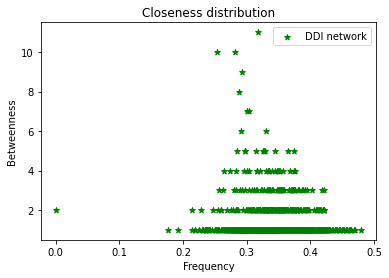

In [10]:
cl_centrality = nx.closeness_centrality(G)
#for k, v in bw_centrality.items():
#    bw_centrality[k] = int(v/100)
cl_2 = dict(collections.Counter(cl_centrality.values()))
#print (bw_centrality)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Closeness distribution')
plt.xlabel('Frequency')
plt.ylabel('Betweenness')
#plt.legend(['Initial network','Network after attack-repair rounds'], loc='upper right')
#plt.xlim((2.5e-3,1.5e-1))
#plt.ylim((.9,6.5e2))
plt.scatter(cl_2.keys(),cl_2.values(),c='g',marker='*')
plt.legend(['DDI network'], loc='upper right')


In [10]:
cl_list = list(cl_centrality.values())
#round_bw = [int(round(num, 0)) for num in bw_list]
print (cl_list)

[0.29965325299288137, 0.38648840955982267, 0.4129330492833822, 0.28300194678905655, 0.36289936952956287, 0.39252139936758573, 0.33857035148817, 0.3432887665117537, 0.30665734325592636, 0.3326910978653049, 0.295689197220805, 0.2911950067684743, 0.3601919734572743, 0.2925359435422506, 0.33658764725469215, 0.3678766543905292, 0.35220405691722384, 0.3077519895602565, 0.38748099616543374, 0.27753582502996693, 0.4622762554788687, 0.3103634104025009, 0.3840290496517105, 0.31613496675100217, 0.31630065593693035, 0.33593189620242864, 0.37081514686799577, 0.3153915085067484, 0.4146352810220976, 0.39137590890250523, 0.41520581460451533, 0.4132157833123335, 0.2397226023943051, 0.42070522936748905, 0.3050298971582831, 0.3207555947529434, 0.41492035168625857, 0.2964881609077195, 0.28848071296733413, 0.2647517664082751, 0.3454502870793721, 0.3475391025209692, 0.3031909829327622, 0.283201150411855, 0.3952204659644159, 0.3053385537706365, 0.3317766088662249, 0.3183865215128795, 0.42143970078747417, 0.3

In [11]:
with open('C:/Hyperion/4.2/ddi-closeness42.csv', mode='w', newline='') as csv_file3:
    results_writer_cd = csv.writer(csv_file3, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for iter in range (0, len(cl_list)):
        print (" step ", iter)
        results_writer_cd.writerow([cl_list[iter]])

 step  0
 step  1
 step  2
 step  3
 step  4
 step  5
 step  6
 step  7
 step  8
 step  9
 step  10
 step  11
 step  12
 step  13
 step  14
 step  15
 step  16
 step  17
 step  18
 step  19
 step  20
 step  21
 step  22
 step  23
 step  24
 step  25
 step  26
 step  27
 step  28
 step  29
 step  30
 step  31
 step  32
 step  33
 step  34
 step  35
 step  36
 step  37
 step  38
 step  39
 step  40
 step  41
 step  42
 step  43
 step  44
 step  45
 step  46
 step  47
 step  48
 step  49
 step  50
 step  51
 step  52
 step  53
 step  54
 step  55
 step  56
 step  57
 step  58
 step  59
 step  60
 step  61
 step  62
 step  63
 step  64
 step  65
 step  66
 step  67
 step  68
 step  69
 step  70
 step  71
 step  72
 step  73
 step  74
 step  75
 step  76
 step  77
 step  78
 step  79
 step  80
 step  81
 step  82
 step  83
 step  84
 step  85
 step  86
 step  87
 step  88
 step  89
 step  90
 step  91
 step  92
 step  93
 step  94
 step  95
 step  96
 step  97
 step  98
 step  99
 step  100

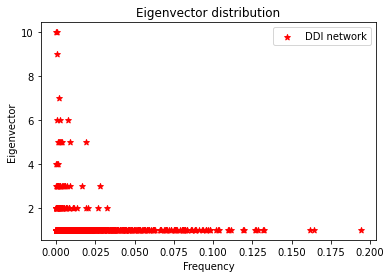

In [11]:
eig_centrality = nx.eigenvector_centrality(G)
#for k, v in bw_centrality.items():
#    bw_centrality[k] = int(v/100)
eig_2 = dict(collections.Counter(eig_centrality.values()))
#print (bw_centrality)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Eigenvector distribution')
plt.xlabel('Frequency')
plt.ylabel('Eigenvector')
#plt.legend(['Initial network','Network after attack-repair rounds'], loc='upper right')
#plt.xlim((2.5e-3,1.5e-1))
#plt.ylim((.9,6.5e2))
plt.scatter(eig_2.keys(),eig_2.values(),c='r',marker='*')
plt.legend(['DDI network'], loc='upper right')

In [12]:
eig_list = list(eig_centrality.values())
print (eig_list)

[0.0010280613331503075, 0.021277188755148904, 0.03661044749340403, 0.0006018752975782071, 0.008260298076422569, 0.025630791423328775, 0.00480401106458328, 0.004680438594664114, 0.0012739344061272167, 0.004841866183431154, 0.0011550848642318697, 0.0008589390240213644, 0.00920213080640593, 0.0014772178690794445, 0.004634244215481578, 0.013575785048983623, 0.010991784596265604, 0.0028150076660028093, 0.03059664856612452, 0.0011419088618763193, 0.1322955718066042, 0.0026926394016768755, 0.014403213638543575, 0.001533761452726022, 0.001849799349742735, 0.007656869464579772, 0.018970601773436697, 0.0044229440774396405, 0.04823240818157175, 0.027493203703394226, 0.07018782178340045, 0.04688708400292652, 7.855062307932662e-05, 0.05618415334657109, 0.0011701558791784878, 0.006833131358744861, 0.03778218501498568, 0.003175180120886275, 0.0005406296108265192, 0.0001396292223241579, 0.0037931368415505154, 0.0052313706734446914, 0.0010488123354471489, 0.000546122007548647, 0.030752271110081917, 0.0

In [14]:
with open('C:/Hyperion/4.2/ddi-eigenvector42.csv', mode='w', newline='') as csv_file4:
    results_writer_eig = csv.writer(csv_file4, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for iter in range (0, len(eig_list)):
        print (" step ", iter)
        results_writer_eig.writerow([eig_list[iter]])

 step  0
 step  1
 step  2
 step  3
 step  4
 step  5
 step  6
 step  7
 step  8
 step  9
 step  10
 step  11
 step  12
 step  13
 step  14
 step  15
 step  16
 step  17
 step  18
 step  19
 step  20
 step  21
 step  22
 step  23
 step  24
 step  25
 step  26
 step  27
 step  28
 step  29
 step  30
 step  31
 step  32
 step  33
 step  34
 step  35
 step  36
 step  37
 step  38
 step  39
 step  40
 step  41
 step  42
 step  43
 step  44
 step  45
 step  46
 step  47
 step  48
 step  49
 step  50
 step  51
 step  52
 step  53
 step  54
 step  55
 step  56
 step  57
 step  58
 step  59
 step  60
 step  61
 step  62
 step  63
 step  64
 step  65
 step  66
 step  67
 step  68
 step  69
 step  70
 step  71
 step  72
 step  73
 step  74
 step  75
 step  76
 step  77
 step  78
 step  79
 step  80
 step  81
 step  82
 step  83
 step  84
 step  85
 step  86
 step  87
 step  88
 step  89
 step  90
 step  91
 step  92
 step  93
 step  94
 step  95
 step  96
 step  97
 step  98
 step  99
 step  100

In [13]:
eig_list = list(eig_centrality.values())
eig_array = np.asarray(eig_list, dtype=np.float)
results_eig = powerlaw.Fit(eig_array)
print ("Eigenvector")
print(results_eig.power_law.alpha)
print(results_eig.power_law.xmin)

Calculating best minimal value for power law fit


Eigenvector
5.502368823839867
0.07913170719777113


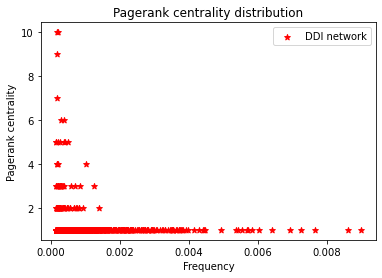

In [15]:
pag_centrality = nx.pagerank(G)
#for k, v in bw_centrality.items():
#    bw_centrality[k] = int(v/100)
pag_2 = dict(collections.Counter(pag_centrality.values()))
#print (bw_centrality)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Pagerank centrality distribution')
plt.xlabel('Frequency')
plt.ylabel('Pagerank centrality')
#plt.legend(['Initial network','Network after attack-repair rounds'], loc='upper right')
#plt.xlim((2.5e-3,1.5e-1))
#plt.ylim((.9,6.5e2))
plt.scatter(pag_2.keys(),pag_2.values(),c='r',marker='*')
plt.legend(['DDI network'], loc='upper right')

In [16]:
pag_list = list(pag_centrality.values())
pag_array = np.asarray(pag_list, dtype=np.float)
results_pag = powerlaw.Fit(pag_array)
print ("Pagerank")
print(results_pag.power_law.alpha)
print(results_pag.power_law.xmin)

Calculating best minimal value for power law fit


Pagerank
2.406355574699737
0.0006274624633707605


In [16]:
pag_list = list(pag_centrality.values())
print (pag_list)

[0.00020862414422341663, 0.0025588203654957685, 0.0072543509051071235, 0.0002243036020222589, 0.0016960617520406628, 0.0064182436049265755, 0.0009228489306921568, 0.000909872105402699, 0.0005948514564056543, 0.0010644470553377492, 0.0008099644192670104, 0.00047562572263408346, 0.0007769231552315805, 0.0007928287058147932, 0.0009402451888198196, 0.0015222680125097587, 0.0021171330298759066, 0.001369052561876488, 0.0018733678660124186, 0.0007107794928498674, 0.005723799117574631, 0.00048100189943190986, 0.0017918368158411596, 0.0003548843469912233, 0.00029391157474601163, 0.0004310765786156508, 0.000714000455574293, 0.0004417657087309546, 0.002776614319459925, 0.0013769541092440742, 0.0035276029599914426, 0.002606220103248287, 0.00018636758042251143, 0.00293247093918374, 0.00024390939932808937, 0.0006144131200070658, 0.0020218637643232935, 0.00025009682097114285, 0.0003639551080742557, 0.00037625334992447384, 0.001235528977276757, 0.0007210327522643888, 0.00020373188016113778, 0.00016277

In [17]:
with open('C:/Hyperion/4.2/ddi-pagerank42.csv', mode='w', newline='') as csv_file5:
    results_writer_pag = csv.writer(csv_file5, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for iter in range (0, len(pag_list)):
        print (" step ", iter)
        results_writer_pag.writerow([pag_list[iter]])

 step  0
 step  1
 step  2
 step  3
 step  4
 step  5
 step  6
 step  7
 step  8
 step  9
 step  10
 step  11
 step  12
 step  13
 step  14
 step  15
 step  16
 step  17
 step  18
 step  19
 step  20
 step  21
 step  22
 step  23
 step  24
 step  25
 step  26
 step  27
 step  28
 step  29
 step  30
 step  31
 step  32
 step  33
 step  34
 step  35
 step  36
 step  37
 step  38
 step  39
 step  40
 step  41
 step  42
 step  43
 step  44
 step  45
 step  46
 step  47
 step  48
 step  49
 step  50
 step  51
 step  52
 step  53
 step  54
 step  55
 step  56
 step  57
 step  58
 step  59
 step  60
 step  61
 step  62
 step  63
 step  64
 step  65
 step  66
 step  67
 step  68
 step  69
 step  70
 step  71
 step  72
 step  73
 step  74
 step  75
 step  76
 step  77
 step  78
 step  79
 step  80
 step  81
 step  82
 step  83
 step  84
 step  85
 step  86
 step  87
 step  88
 step  89
 step  90
 step  91
 step  92
 step  93
 step  94
 step  95
 step  96
 step  97
 step  98
 step  99
 step  100

In [31]:
per_centrality = nx.algorithms.centrality.percolation_centrality(G)
#for k, v in bw_centrality.items():
#    bw_centrality[k] = int(v/100)
per_2 = dict(collections.Counter(per_centrality.values()))
#print (bw_centrality)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Percolation centrality distribution')
plt.xlabel('Frequency')
plt.ylabel('Percolationk centrality')
#plt.legend(['Initial network','Network after attack-repair rounds'], loc='upper right')
#plt.xlim((2.5e-3,1.5e-1))
#plt.ylim((.9,6.5e2))
plt.scatter(per_2.keys(),per_2.values(),c='r',marker='*')
plt.legend(['DDI network'], loc='upper right')

KeyError: '11607'